# Predictive Analytics

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data=pd.read_csv("vehicles.csv")
pd.set_option('display.max_columns', 500)
data.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,2250,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,4300,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-12750,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1750,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,4300,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-12750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,3050,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-6500,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
print(data.columns)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [33]:
data.shape

(43921, 83)

In [143]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,43921.000000,43921.000000,43921.0,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000
mean,17.100731,0.222177,0.0,0.069337,18.711345,7.107325,0.803420,0.667973,0.000501,0.501762,0.002770,107.017987,5.846952,17.033195,461.315589,20.950297,7.892188,0.858769,0.702051,0.509399,0.000388,0.002744,5.708648,3.281768,7666.484074,0.641447,2624.832085,84.580269,0.642563,-0.921974,24.823296,9.250657,0.957355,0.769019,0.000251,0.519105,0.002708,1.977687,10.067986,22101.964687,1.772979,6.041620,13.328704,33.580633,1.232053,1.217891,0.152167,1.145881,0.142058,23.694636,1.061427,34.841342,1.296095,2002.756927,-4360.527993,0.014563,0.245236,0.247535,0.245167
std,4.688838,1.142489,0.0,0.755676,8.873171,12.818082,6.196962,6.094274,0.038022,4.857902,0.038718,187.162456,57.051850,92.063818,125.486229,8.506240,13.413316,6.175442,6.031382,4.878788,0.033110,0.038302,1.760981,1.352962,16816.265561,2.871225,737.596732,451.324692,2.876897,0.652262,8.363189,14.828787,6.316232,6.109607,0.027543,4.925446,0.037774,5.915676,27.829755,12824.229781,4.320524,9.560227,30.882805,46.030358,17.114142,17.371920,2.657781,16.571627,2.387078,12.619366,8.744933,12.119023,8.853861,11.764501,3702.185122,0.306937,3.618523,3.500939,3.542482
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-1.000000,450.000000,0.000000,-1.000000,-1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1984.000000,-32500.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,386.391304,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.200000,0.000000,-1.000000,2150.000000,0.000000,-1.000000,-1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.421200,0.000000,28.000000,0.000000,1992.000000,-6500.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,444.350000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,162.000000,-1.000000,2600.000000,0.000000,-1.000000,-1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.700000,0.000000,33.400000,0.000000,2004.0

In [3]:
pd.options.display.max_rows = 4000
data.isnull().sum()

barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders            290
displ                288
drive               1186
engId                  0
eng_dscr           16579
feScore                0
fuelCost08             0
fuelCostA08            0
fuelType               0
fuelType1              0
ghgScore               0
ghgScoreA              0
highway08              0
highway08U             0
highwayA08             0
highwayA08U            0
highwayCD              0
highwayE               0


## Replace missing Numerical values with Mean

In [4]:
data=data.fillna(data.mean())

In [5]:
data.isnull().sum()

barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders              0
displ                  0
drive               1186
engId                  0
eng_dscr           16579
feScore                0
fuelCost08             0
fuelCostA08            0
fuelType               0
fuelType1              0
ghgScore               0
ghgScoreA              0
highway08              0
highway08U             0
highwayA08             0
highwayA08U            0
highwayCD              0
highwayE               0


##### Remove data with missing values greater than 30000 records

In [6]:
data1=data.drop(["guzzler", "trans_dscr","tCharger", "sCharger","atvType", "fuelType2", "rangeA", "evMotor", "mfrCode", "c240Dscr", "c240bDscr", "startStop"], axis=1)

In [15]:
data1.isnull().sum()

barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders              0
displ                  0
drive               1186
engId                  0
eng_dscr           16579
feScore                0
fuelCost08             0
fuelCostA08            0
fuelType               0
fuelType1              0
ghgScore               0
ghgScoreA              0
highway08              0
highway08U             0
highwayA08             0
highwayA08U            0
highwayCD              0
highwayE               0


In [7]:
pd.options.display.max_rows = 4000


##### Replace categorical data with "Not Available" and -1 with 0

In [8]:
data1.replace(np.NaN, "Not Available", inplace=True)
data1.replace(-1, 0, inplace=True)

In [9]:
print(data1.isnull().sum())

barrels08          0
barrelsA08         0
charge120          0
charge240          0
city08             0
city08U            0
cityA08            0
cityA08U           0
cityCD             0
cityE              0
cityUF             0
co2                0
co2A               0
co2TailpipeAGpm    0
co2TailpipeGpm     0
comb08             0
comb08U            0
combA08            0
combA08U           0
combE              0
combinedCD         0
combinedUF         0
cylinders          0
displ              0
drive              0
engId              0
eng_dscr           0
feScore            0
fuelCost08         0
fuelCostA08        0
fuelType           0
fuelType1          0
ghgScore           0
ghgScoreA          0
highway08          0
highway08U         0
highwayA08         0
highwayA08U        0
highwayCD          0
highwayE           0
highwayUF          0
hlv                0
hpv                0
id                 0
lv2                0
lv4                0
make               0
model        

##### Exploratory Data Analysis

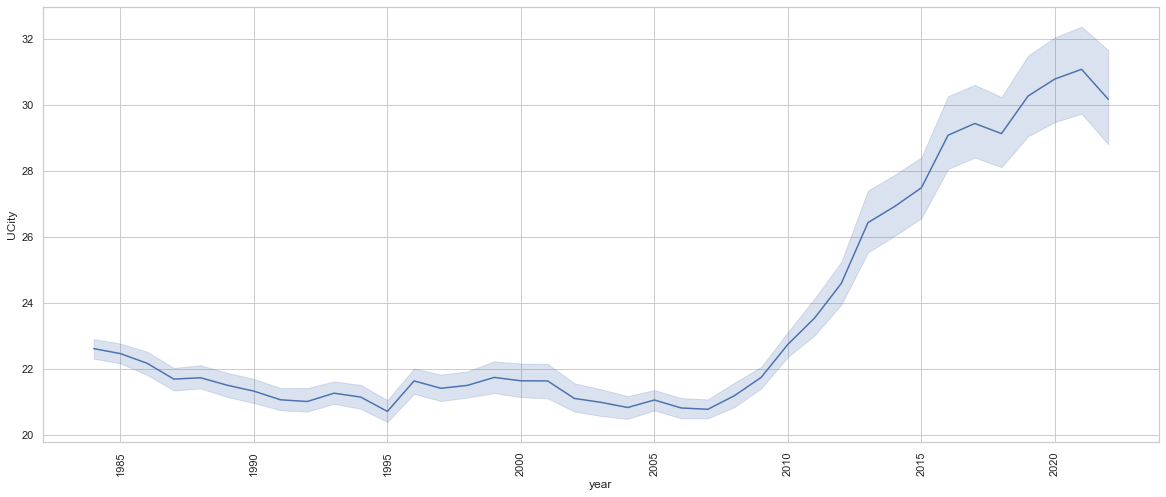

In [71]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax = sns.lineplot(x="year", y="UCity", data=data1)
#median city average has increased from 2013

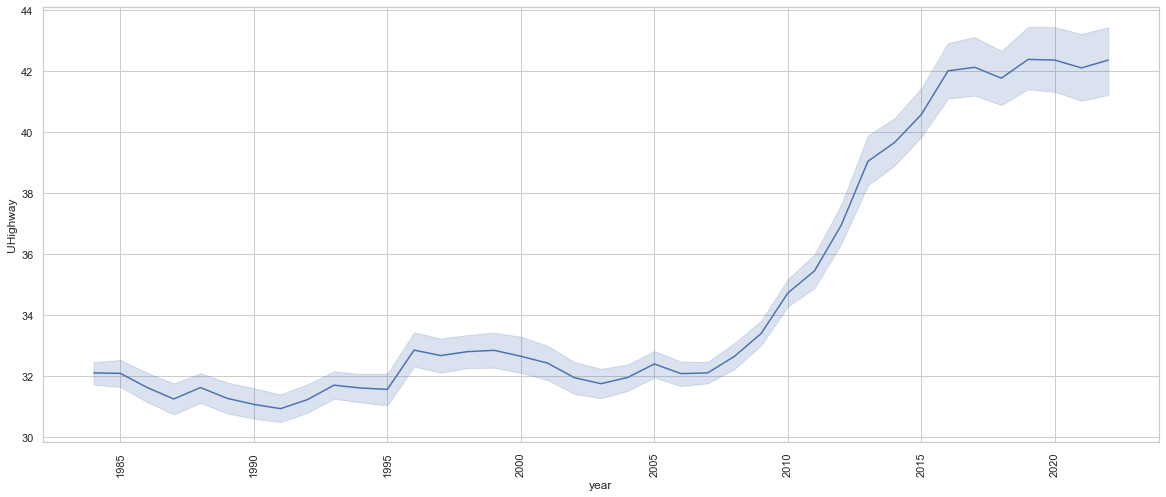

In [73]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax = sns.lineplot(x="year", y="UHighway", data=data1)
#median highway average increase since 2007

<AxesSubplot:xlabel='year', ylabel='fuelType'>

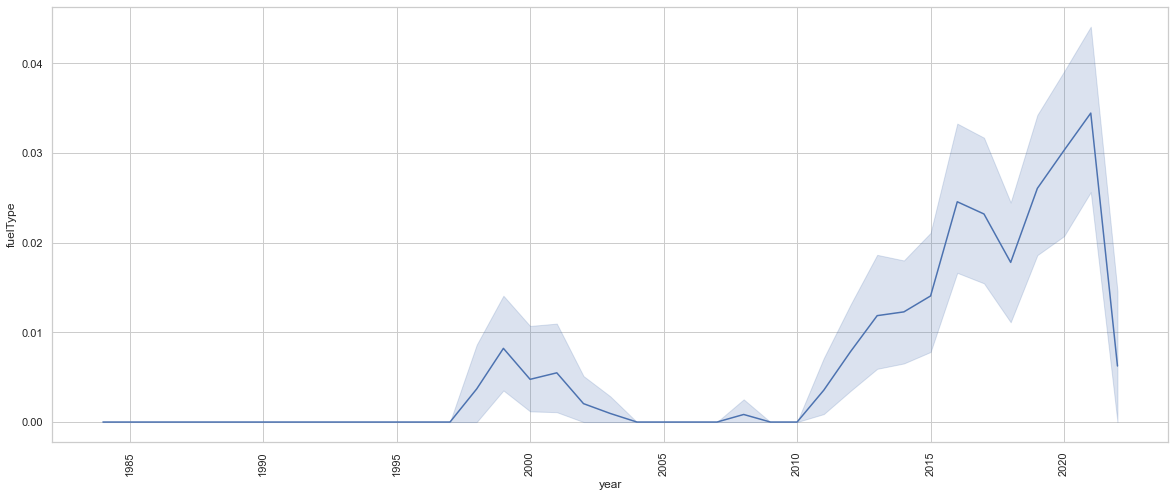

In [92]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.lineplot(data=data1, y=(data["fuelType"]=="Electricity")., x='year',)
#sale of electric vehicles increased after 2010

<AxesSubplot:xlabel='fuelType', ylabel='UCity'>

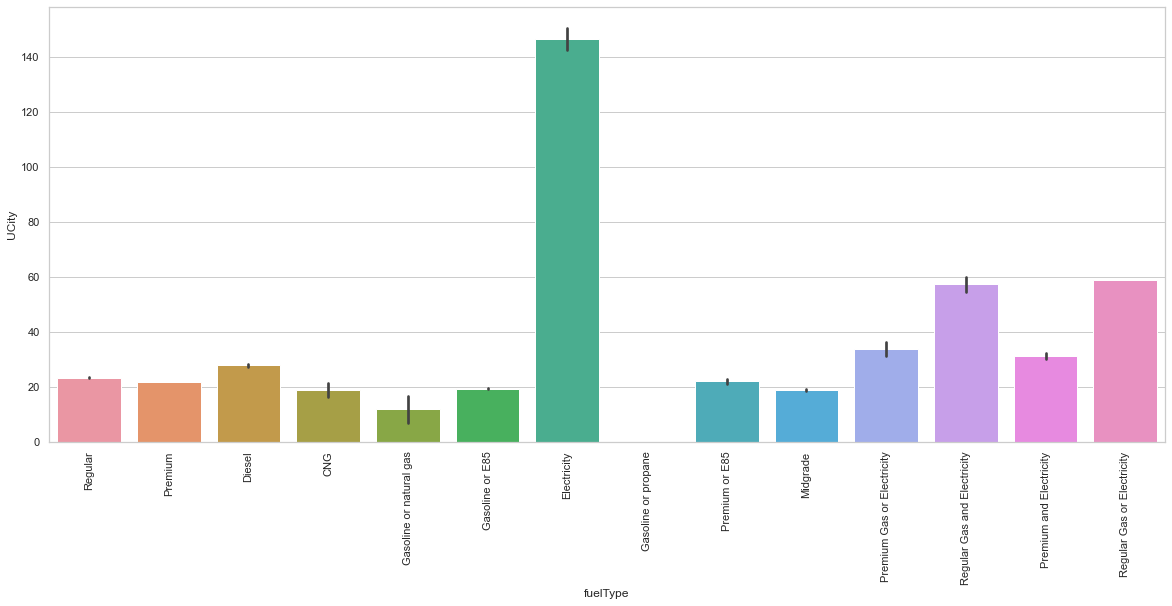

In [51]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(data=data1, x="fuelType", y='UCity')
#electric vehicles have highes ucity average

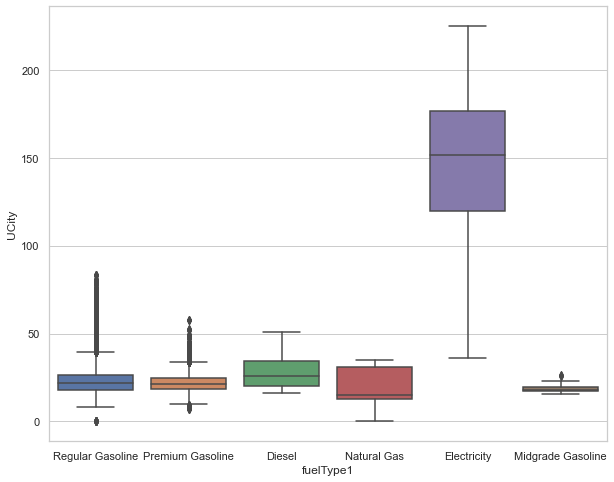

In [52]:
plt.figure(figsize=(10,8))
ax1 = sns.boxplot(x="fuelType1", y="UCity", data=data1)

<AxesSubplot:xlabel='fuelType1', ylabel='count'>

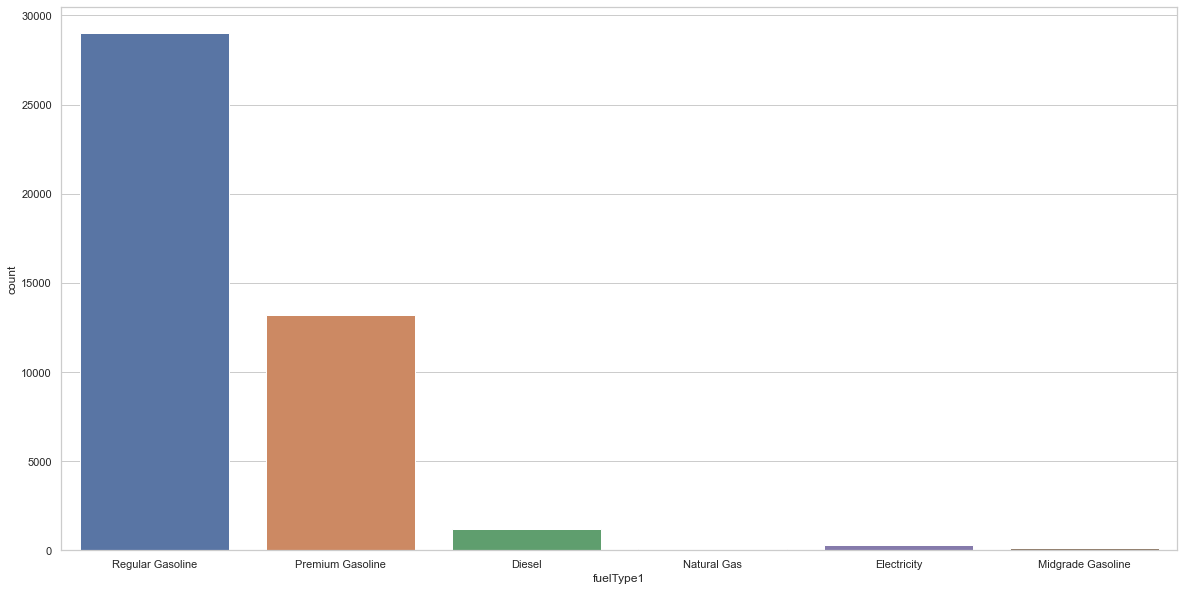

In [54]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data=data1, x="fuelType1")
#most vehicles use regular gasoline

<AxesSubplot:xlabel='fuelType', ylabel='count'>

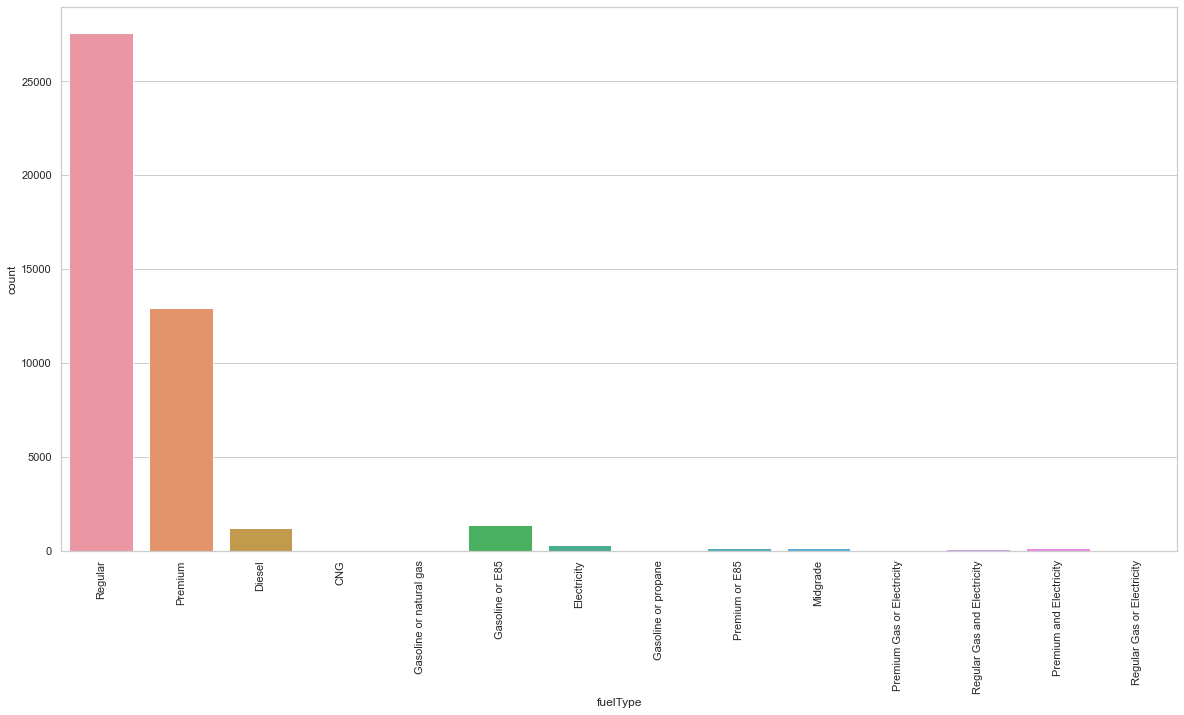

In [95]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data=data1, x="fuelType")
#diving deeper into fuel types by count of vehicles

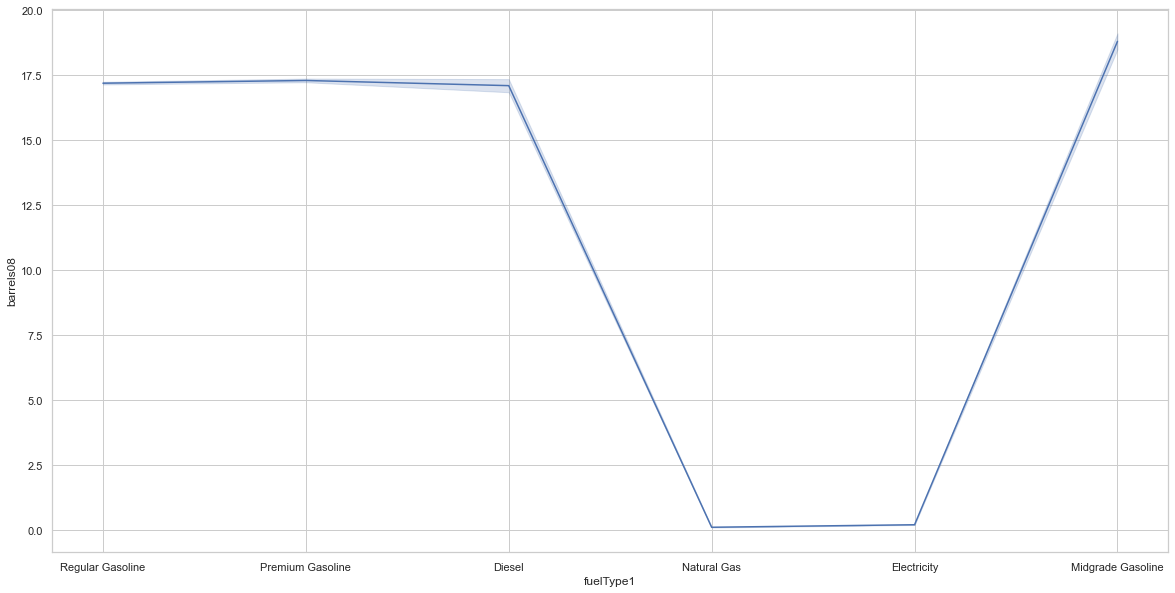

In [55]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(x="fuelType1", y="barrels08", data=data1)
#Mildgrade vehicles consume highest barrels fuel

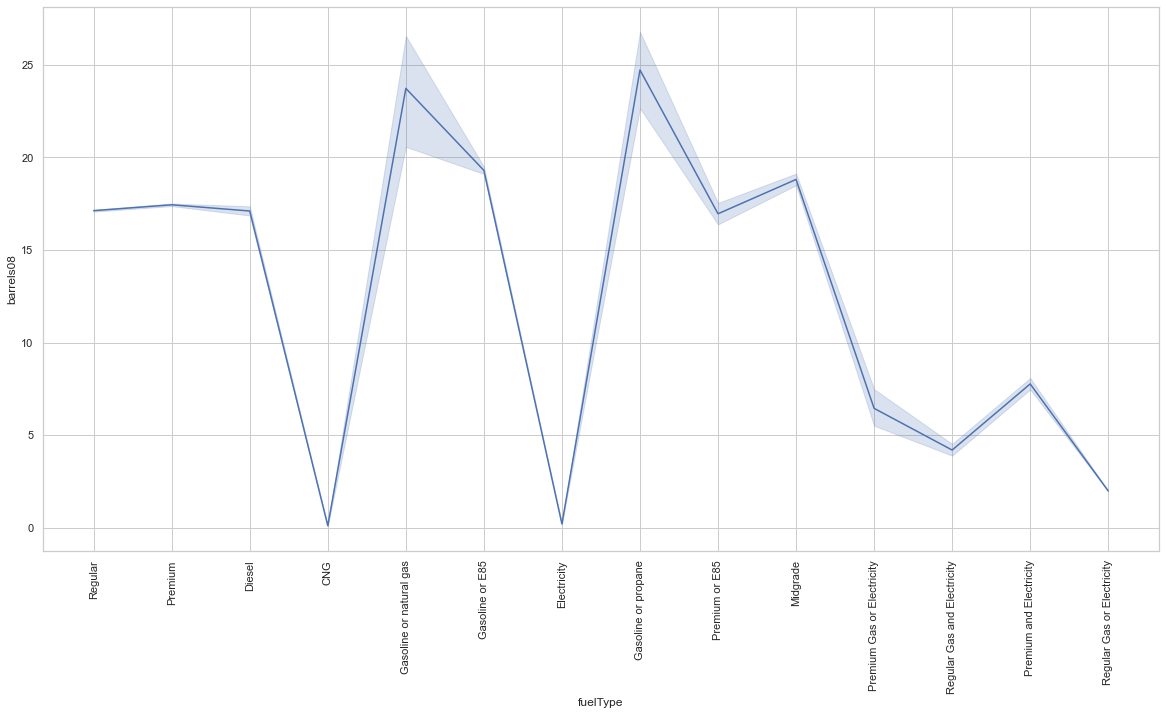

In [97]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax1 = sns.lineplot(x="fuelType", y="barrels08", data=data1)
#Diving deeper into barrels vs fuel types

In [56]:
datanew=data1[['city08','city08U','cityA08', 'cityCD', 'cityE','cityUF', 'UCity']]
datanew.head()

,city08,city08U,cityA08,cityCD,cityE,cityUF,UCity
0,19,0.0,0,0.0,0.0,0.0,23.3333
1,9,0.0,0,0.0,0.0,0.0,11.0000
2,23,0.0,0,0.0,0.0,0.0,29.0000
3,10,0.0,0,0.0,0.0,0.0,12.2222
4,17,0.0,0,0.0,0.0,0.0,21.0000


<AxesSubplot:>

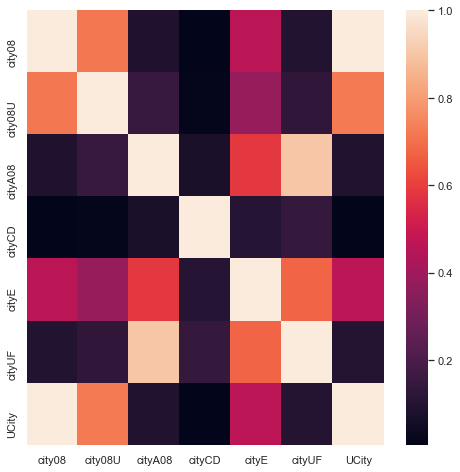

In [58]:
corr=datanew.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:xlabel='UCity', ylabel='city08'>

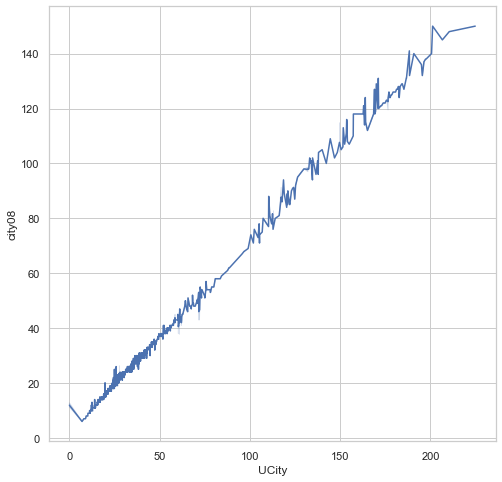

In [59]:
plt.figure(figsize=(8,8))
sns.lineplot(x='UCity', y='city08', data=data1)
#Ucity and city08 are almost identical. Will drop from the model

<AxesSubplot:xlabel='year', ylabel='city08'>

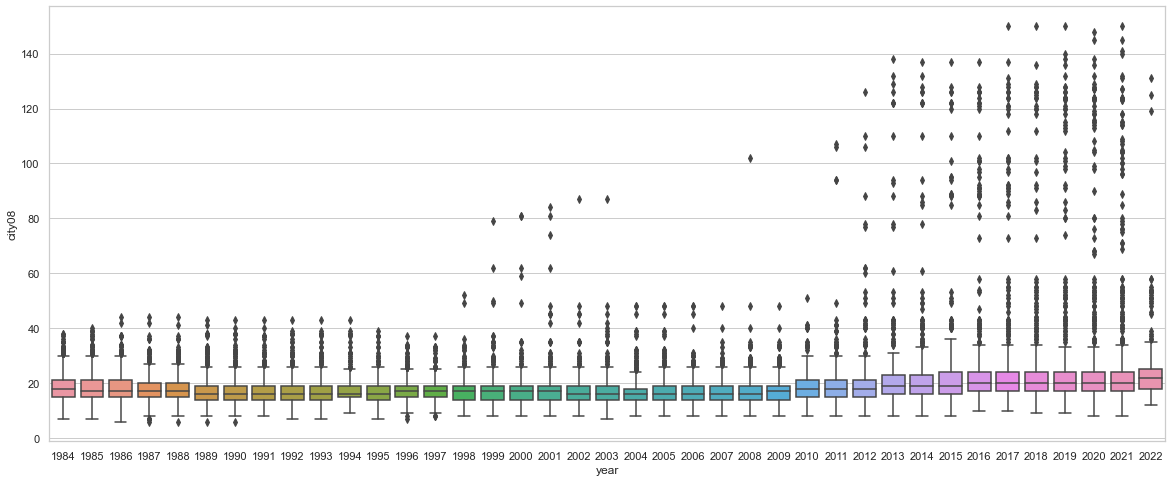

In [60]:
plt.figure(figsize=(20,8))
sns.boxplot(x='year', y='city08', data=data1)
#City08 average has increased over time

<AxesSubplot:xlabel='year', ylabel='co2'>

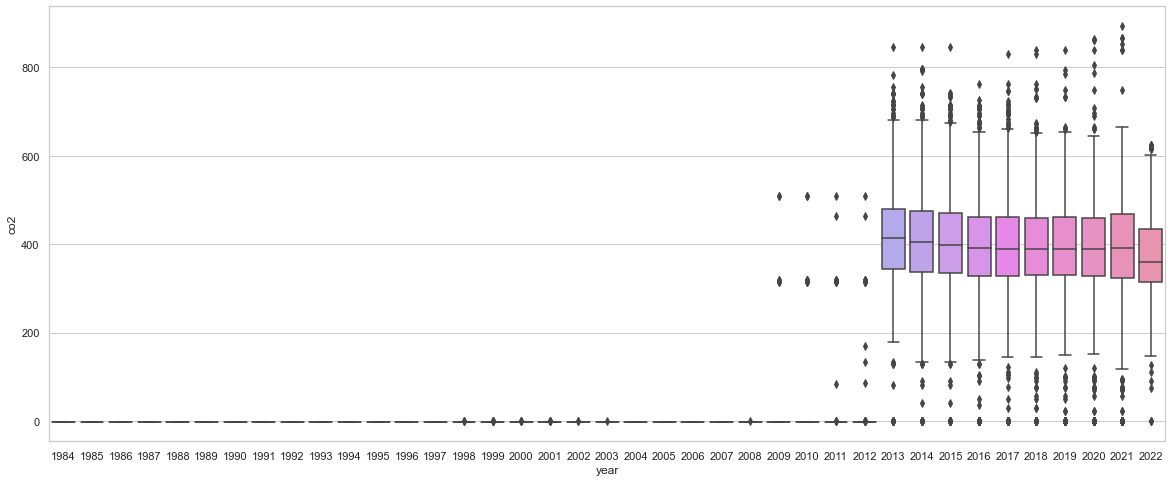

In [61]:
plt.figure(figsize=(20,8))
sns.boxplot(x='year', y='co2', data=data1)
#Co2 emissions have reduced over the years

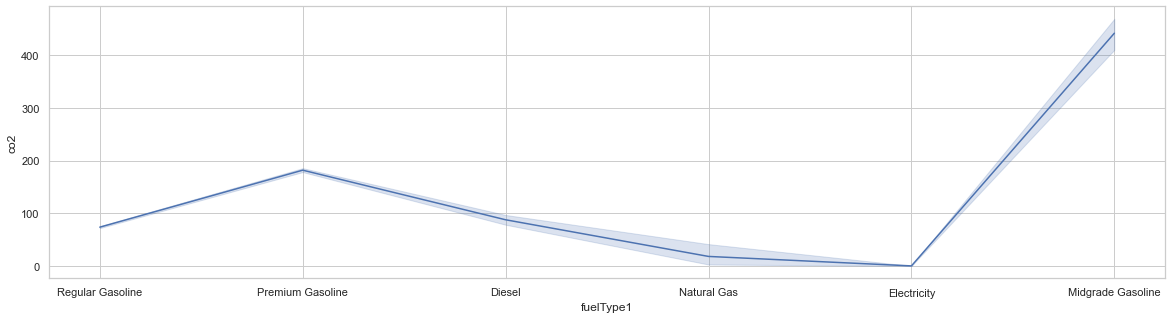

In [62]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(x='fuelType1', y='co2', data=data1)


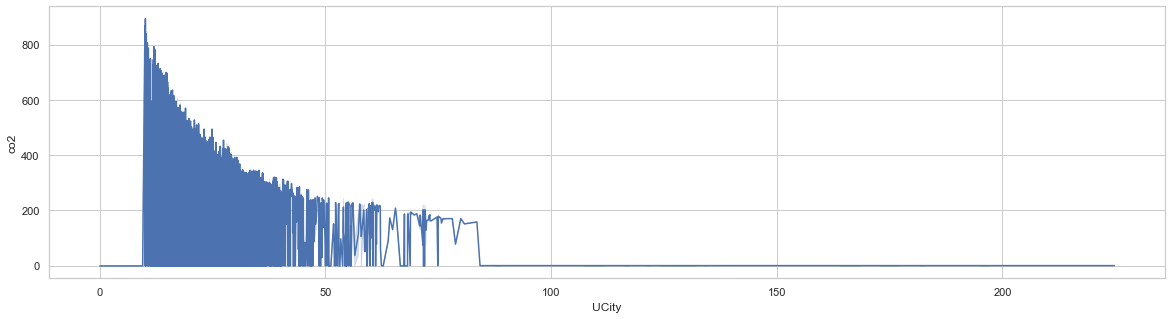

In [63]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(x='UCity', y='co2', data=data1)
#Cars with less co2 emission have better city average

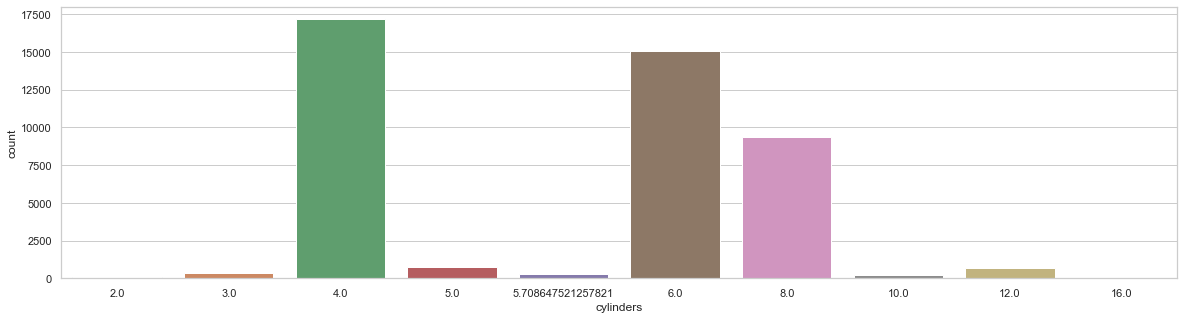

In [64]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x='cylinders', data=data1)
#most vehicles on road are 4 cylinders followed by 6 and 8

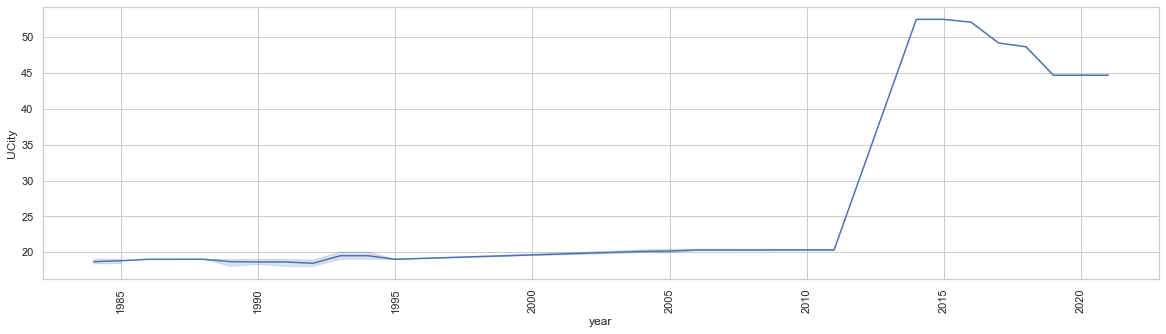

In [98]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.lineplot(y="UCity", x="year", data=data1.loc[data1['cylinders']==2])

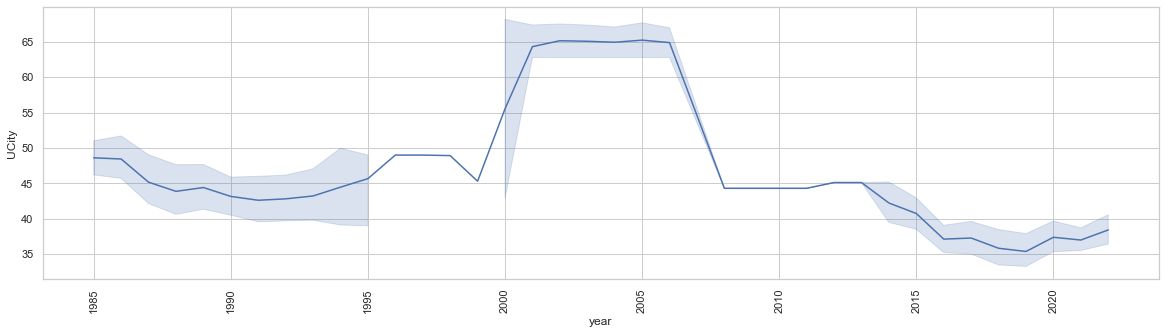

In [100]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.lineplot(y="UCity", x="year", data=data1.loc[data1['cylinders']==3])

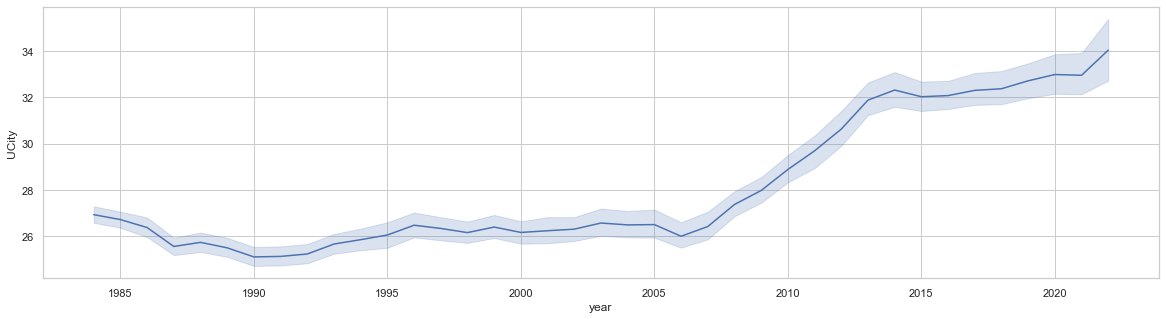

In [101]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(y="UCity", x="year", data=data1.loc[data1['cylinders']==4])

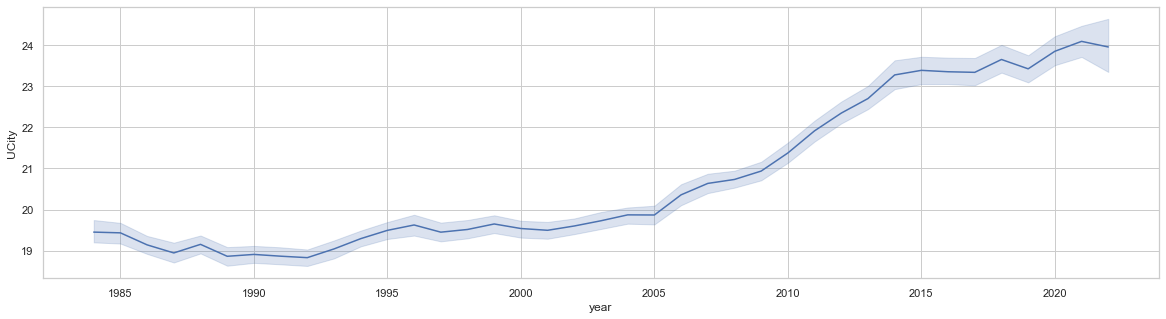

In [102]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(y="UCity", x="year", data=data1.loc[data1['cylinders']==6])

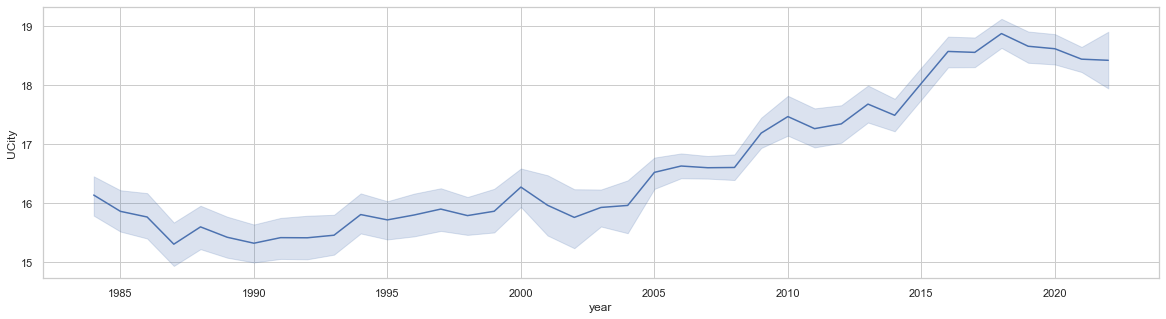

In [103]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(y="UCity", x="year", data=data1.loc[data1['cylinders']==8])

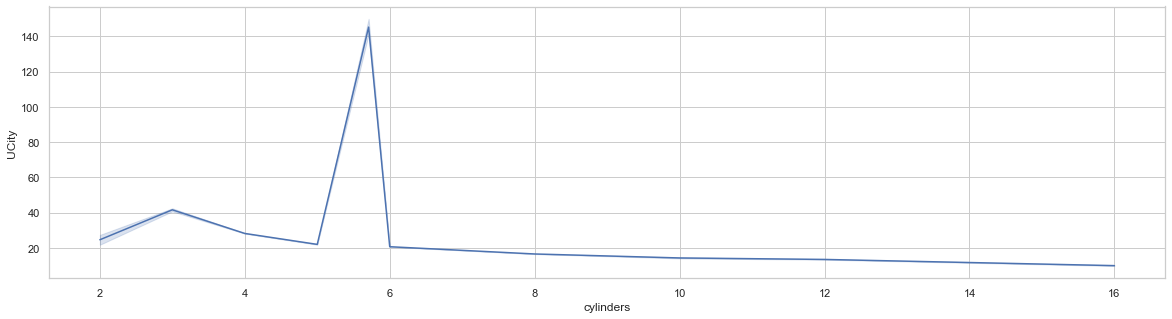

In [71]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(y="UCity", x="cylinders", data=data1)

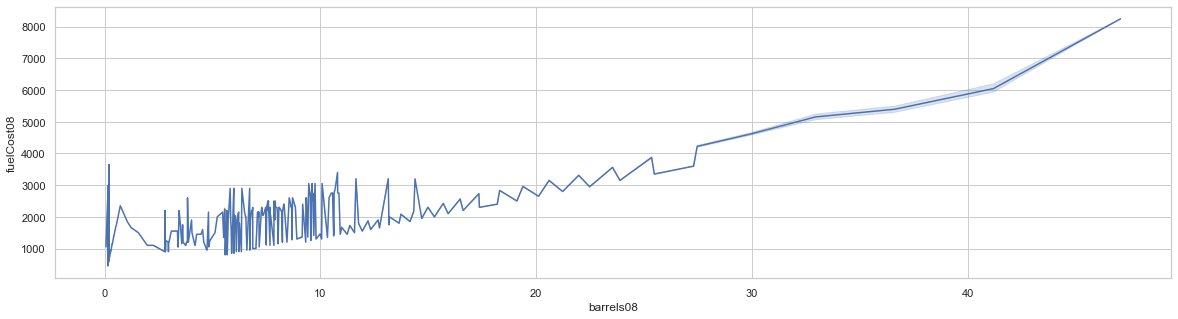

In [72]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(y="fuelCost08", x="barrels08", data=data1)
#fuelcost08 and barrels08 seems to be related

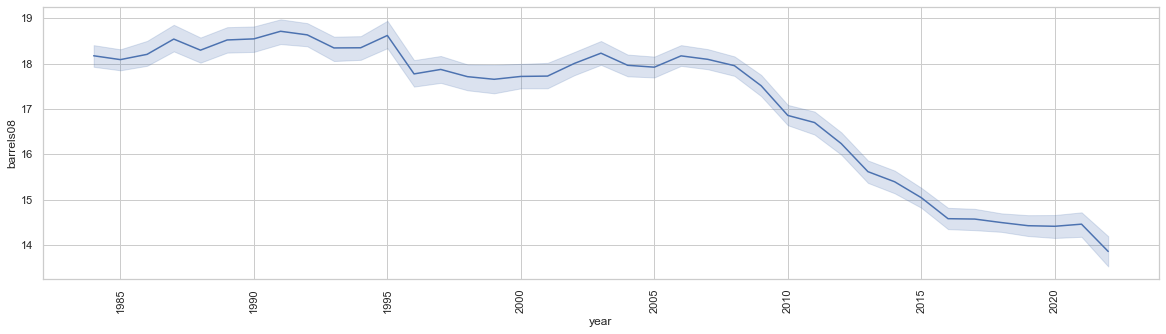

In [105]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.lineplot(x="year", y="barrels08", data=data1)
#barrels08 used per year have reduced over the years

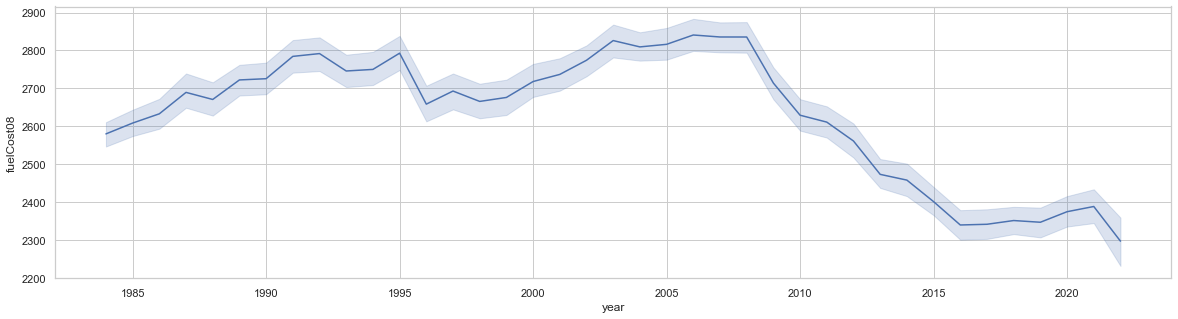

In [117]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(y="fuelCost08", x="year", data=data1)
#Fuelcost have come down with barrels too. Obvious though!

In [122]:
plt.figure(figsize=(20,5))
data2=data1[['highway08','highway08U', 'highwayA08','highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'UHighway','UHighwayA', 'UCity']]
data2.head()

,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,UHighway,UHighwayA,UCity
0,25,0.0,0,0.0,0.0,0.0,0.0,35.0000,0.0,23.3333
1,14,0.0,0,0.0,0.0,0.0,0.0,19.0000,0.0,11.0000
2,33,0.0,0,0.0,0.0,0.0,0.0,47.0000,0.0,29.0000
3,12,0.0,0,0.0,0.0,0.0,0.0,16.6667,0.0,12.2222
4,23,0.0,0,0.0,0.0,0.0,0.0,32.0000,0.0,21.0000


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

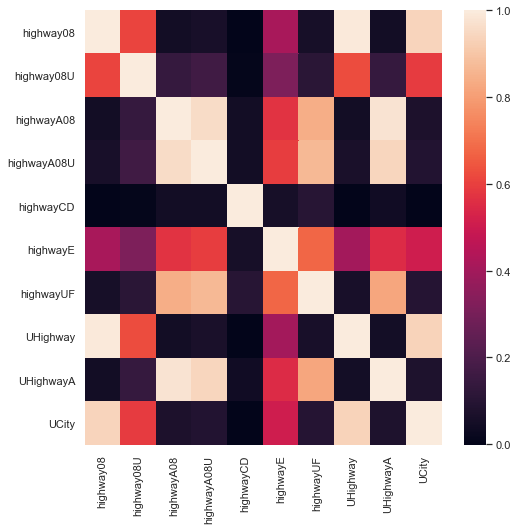

In [123]:
corr1=data2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
#High correlation between highway08 and Ucity. Similar thing can be seen with highwayA08 and HighwayA08U. One needs to be dropped 
#reduce collinearity

In [77]:
data1['make'].nunique()
#139 unique vehicle manufacturers

139

In [108]:
mostfreq=data1["make"].value_counts()[:10].index.tolist()
print(mostfreq)

['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Toyota', 'BMW', 'Mercedes-Benz', 'Nissan', 'Volkswagen', 'Porsche']


In [109]:
data3=data1[np.isin(data1, mostfreq).any(axis=1)]

<AxesSubplot:xlabel='make', ylabel='count'>

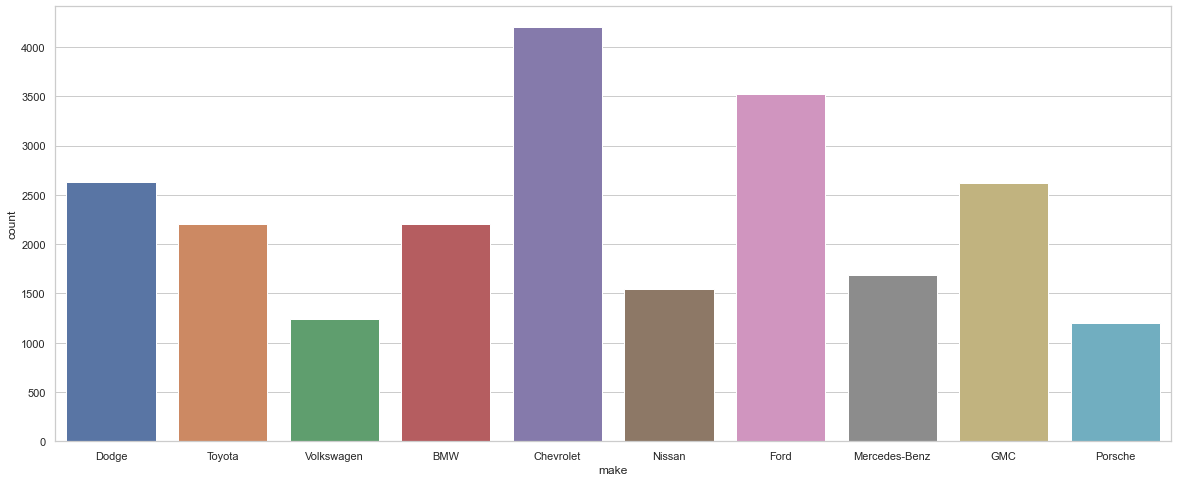

In [80]:
plt.figure(figsize=(20,8))
sns.countplot(x='make', data=data3)
#chevrolet, ford and gmc has highest vehicles on road

<AxesSubplot:xlabel='make', ylabel='UCity'>

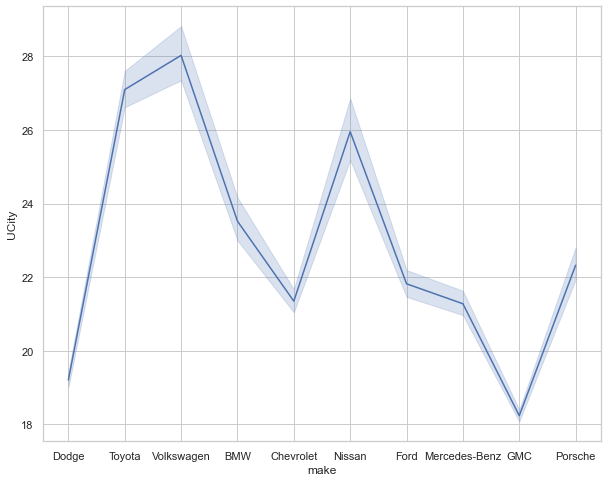

In [113]:
plt.figure(figsize=(10,8))
sns.lineplot(x='make', y='UCity', data=data3)
#Toyota, Volkswagen and Nissan have best city averages

<AxesSubplot:xlabel='make', ylabel='co2'>

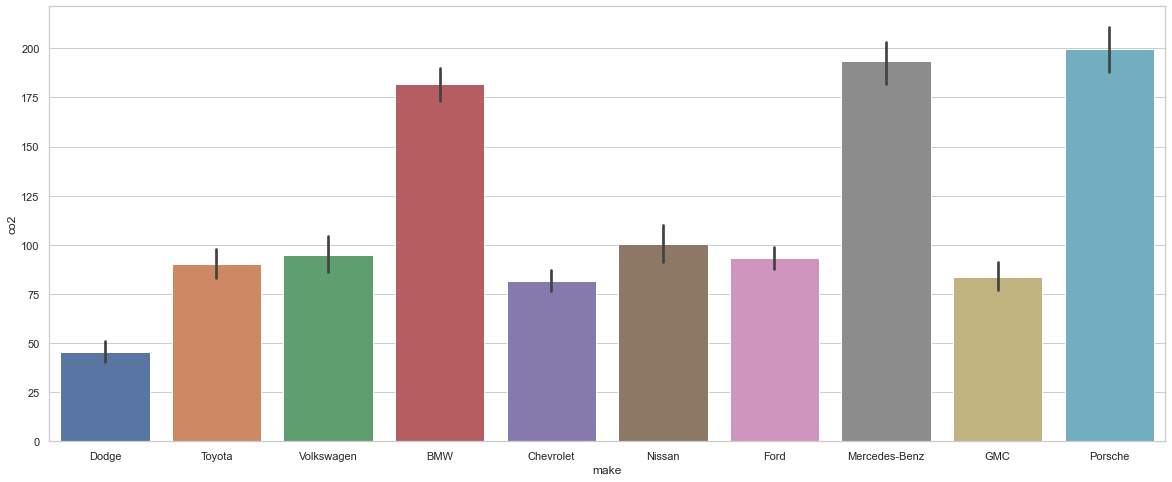

In [124]:
plt.figure(figsize=(20,8))
sns.barplot(x='make', y='co2', data=data3)
#chevrolet, #dodge and gmc have lowest co2 emissions

<AxesSubplot:xlabel='make', ylabel='UHighway'>

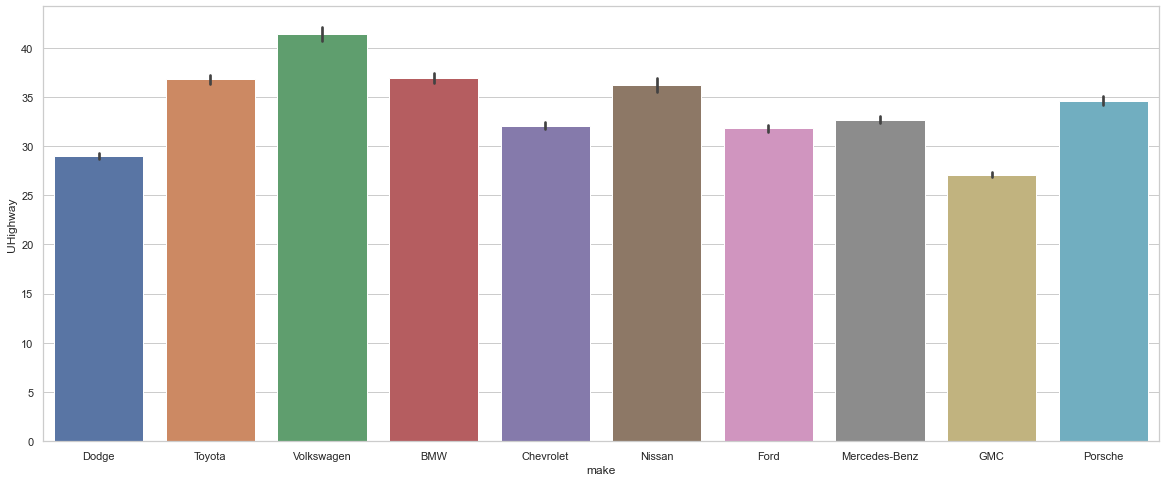

In [125]:
plt.figure(figsize=(20,8))
sns.barplot(x='make', y='UHighway', data=data3)
#all vehicles perform similarly on highway with Volkswagen being an exception

<AxesSubplot:xlabel='displ', ylabel='UCity'>

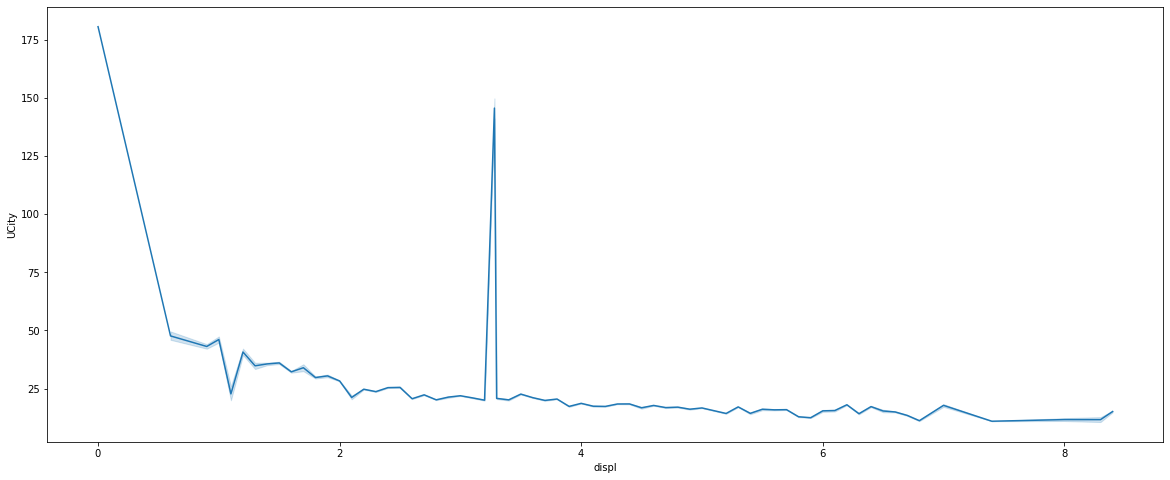

In [11]:
plt.figure(figsize=(20,8))
sns.lineplot(y='UCity', x='displ', data=data1)
#with higher displacement UCity average reduces

<AxesSubplot:xlabel='VClass', ylabel='count'>

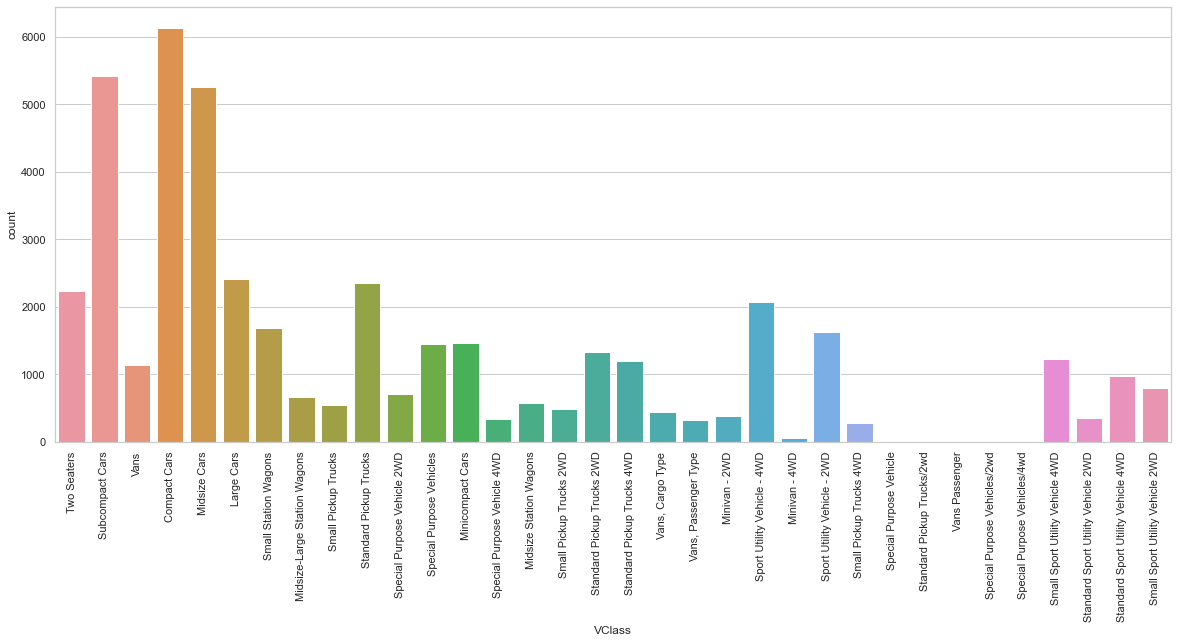

In [86]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x='VClass', data=data1)
#most vehicles on road are compact cars

<AxesSubplot:xlabel='VClass', ylabel='UCity'>

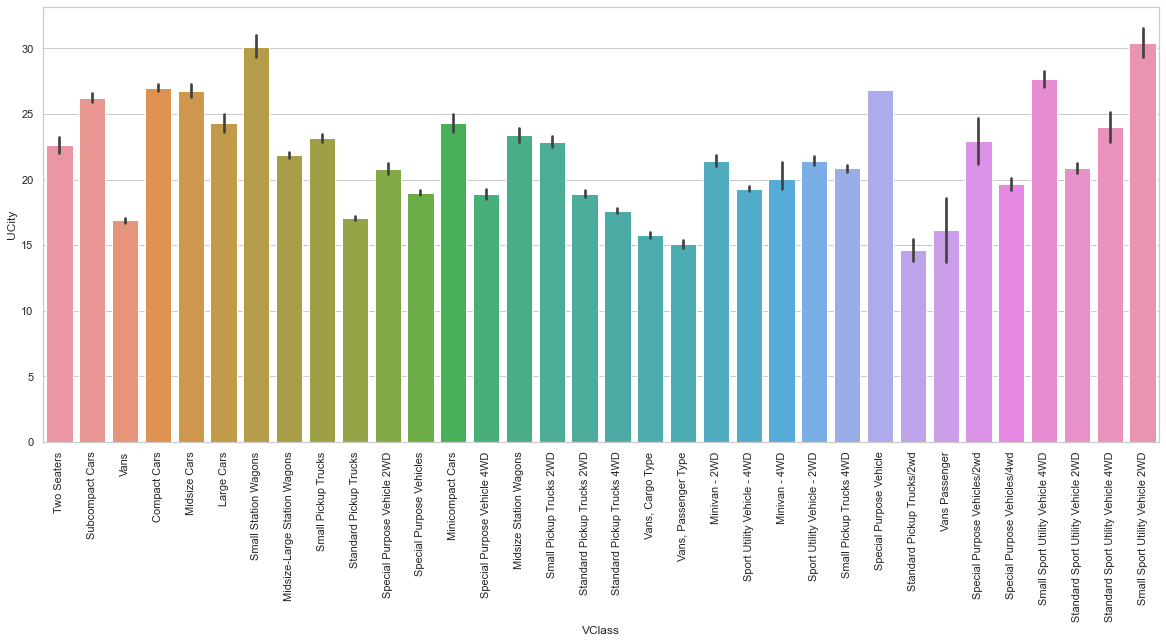

In [129]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x='VClass', y='UCity', data=data1)

<AxesSubplot:xlabel='year', ylabel='UCity'>

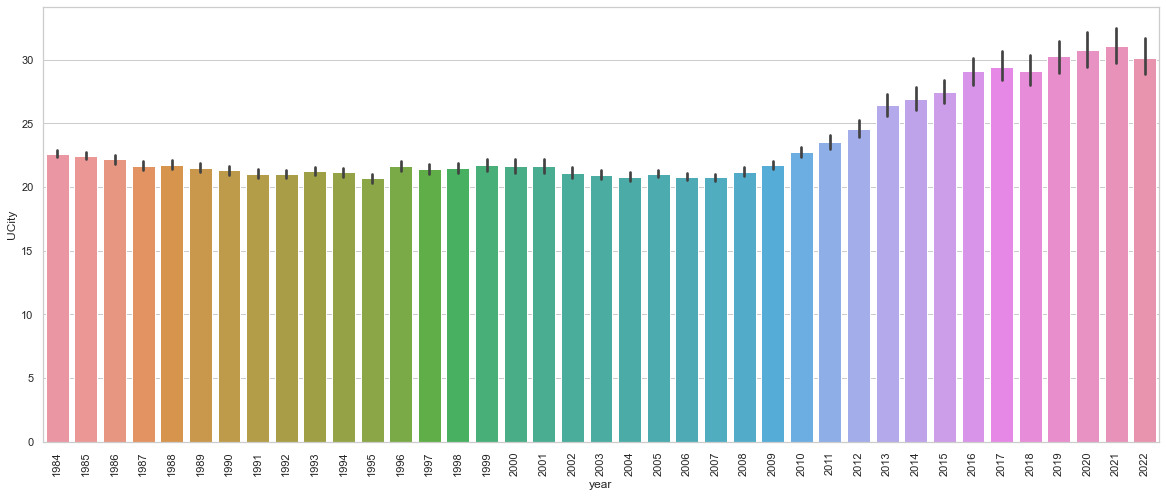

In [133]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90) 
sns.barplot(x='year', y='UCity', data=data1)
#2010 was a turning point! after that UCITY Average has increased a lot

<AxesSubplot:xlabel='year', ylabel='count'>

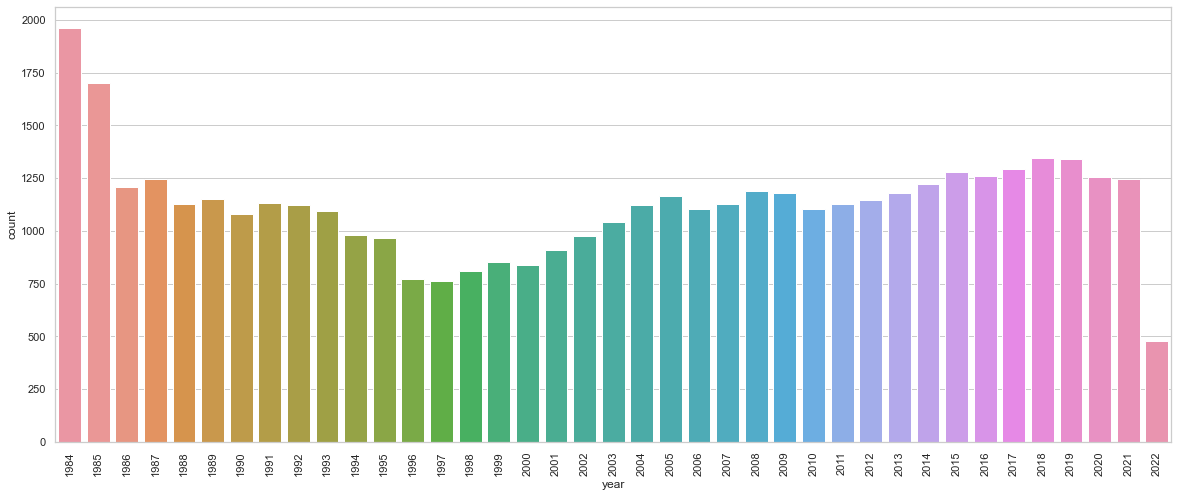

In [89]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x='year', data=data1)
#most vehicles are from 1984

<AxesSubplot:xlabel='year', ylabel='youSaveSpend'>

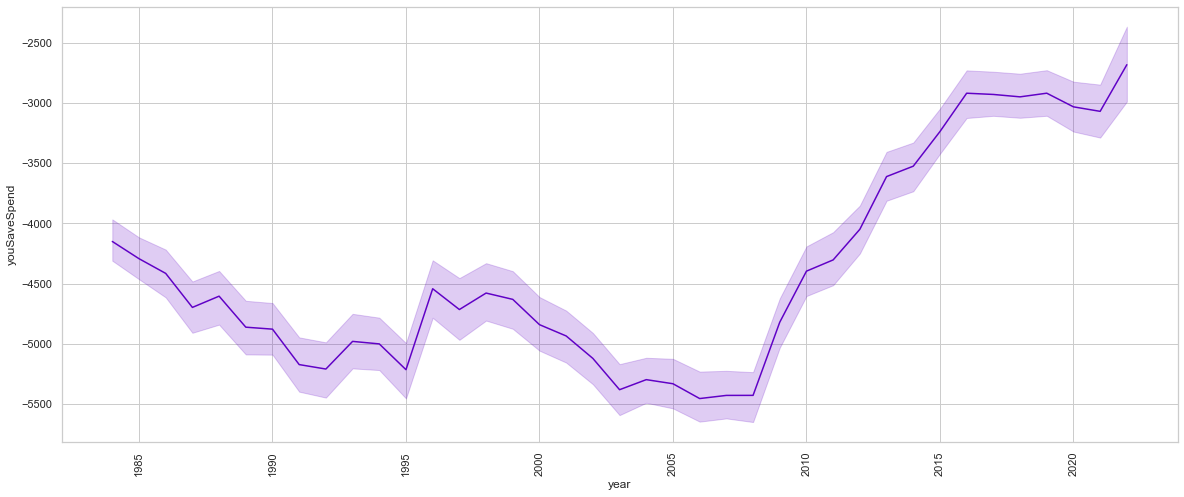

In [139]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.lineplot(x='year', y='youSaveSpend', data=data1)
#save to spend ratio has increased over the years

<AxesSubplot:xlabel='fuelType', ylabel='youSaveSpend'>

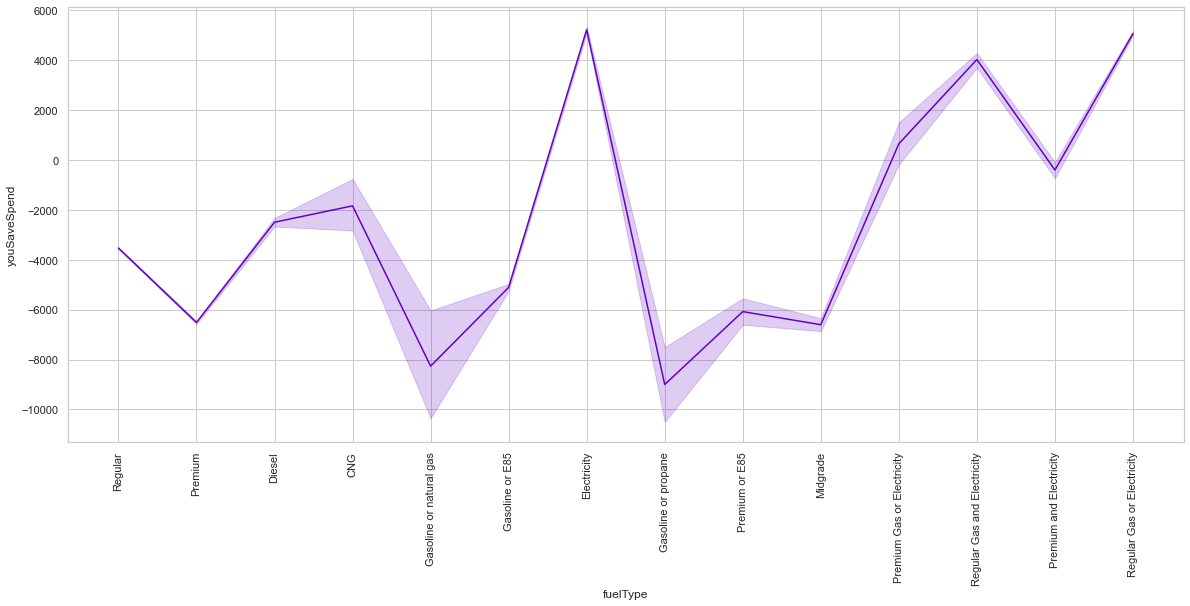

In [140]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.lineplot(x='fuelType', y='youSaveSpend', data=data1)
#electric vehicles offer highest savings

In [90]:
plt.figure(figsize=(20,5))
data4=data1[['comb08','comb08U','combA08','combA08U','combE','combinedCD','combinedUF','UCity']]
data4.head()

,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,UCity
0,21,0.0,0,0.0,0.0,0.0,0.0,23.3333
1,11,0.0,0,0.0,0.0,0.0,0.0,11.0000
2,27,0.0,0,0.0,0.0,0.0,0.0,29.0000
3,11,0.0,0,0.0,0.0,0.0,0.0,12.2222
4,19,0.0,0,0.0,0.0,0.0,0.0,21.0000


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

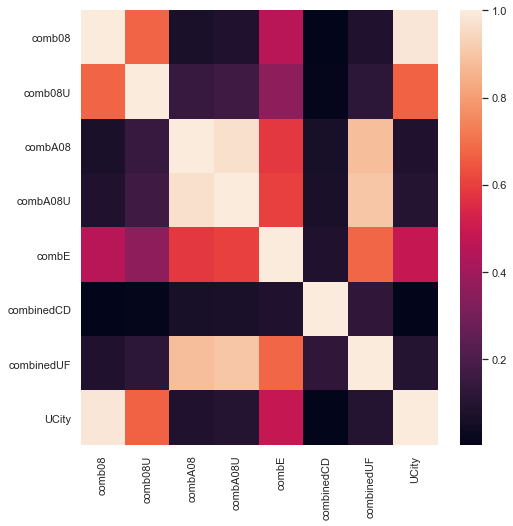

In [91]:
corr4=data4.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr4, 
            xticklabels=corr4.columns.values,
            yticklabels=corr4.columns.values)

In [11]:
datafinal.head()

,barrels08,barrelsA08,charge120,charge240,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,2250,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,4300,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-12750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1750,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,Not Available,-1,4300,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-12750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,3050,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-6500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


In [10]:
datafinal=datafinal.drop(['UCityA'], axis=1)

In [15]:
datafinal.describe()

,barrels08,barrelsA08,charge120,charge240,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,43921.000000,43921.000000,43921.0,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000
mean,17.100731,0.222177,0.0,0.069337,7.107325,0.803420,0.667973,0.000501,0.501762,0.002770,107.017987,5.846952,17.033195,461.315589,20.950297,7.892188,0.858769,0.702051,0.509399,0.000388,0.002744,5.708648,3.281768,7666.484074,0.641447,2624.832085,84.580269,0.642563,-0.921974,24.823296,9.250657,0.957355,0.769019,0.000251,0.519105,0.002708,1.977687,10.067986,22101.964687,1.772979,6.041620,13.328704,33.580633,1.232053,1.217891,0.152167,1.145881,0.142058,23.694636,34.841342,1.296095,2002.756927,-4360.527993,0.014563,0.245236,0.247535,0.245167
std,4.688838,1.142489,0.0,0.755676,12.818082,6.196962,6.094274,0.038022,4.857902,0.038718,187.162456,57.051850,92.063818,125.486229,8.506240,13.413316,6.175442,6.031382,4.878788,0.033110,0.038302,1.760981,1.352962,16816.265561,2.871225,737.596732,451.324692,2.876897,0.652262,8.363189,14.828787,6.316232,6.109607,0.027543,4.925446,0.037774,5.915676,27.829755,12824.229781,4.320524,9.560227,30.882805,46.030358,17.114142,17.371920,2.657781,16.571627,2.387078,12.619366,12.119023,8.853861,11.764501,3702.185122,0.306937,3.618523,3.500939,3.542482
min,0.060000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-1.000000,450.000000,0.000000,-1.000000,-1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1984.000000,-32500.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,386.391304,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.200000,0.000000,-1.000000,2150.000000,0.000000,-1.000000,-1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.421200,28.000000,0.000000,1992.000000,-6500.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,444.350000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,162.000000,-1.000000,2600.000000,0.000000,-1.000000,-1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.700000,33.400000,0.000000,2004.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,0.000000,0.0,0.000000,16.039500,0.000000,0.000000,0.000000,0.000

In [153]:
datafinal.dtypes

barrels08          float64
barrelsA08         float64
city08U            float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
cylinders          float64
displ              float64
drive               object
fuelCost08           int64
fuelType            object
fuelType1           object
ghgScore             int64
highway08            int64
make                object
model               object
phevBlended           bool
rangeHwyA          float64
trany               object
UCity              float64
UCityA             float64
UHighway           float64
UHighwayA          float64
VClass              object
year                 int64
youSaveSpend         int64
phevCity             int64
dtype: object

In [66]:
datafinal.describe()

,barrels08,barrelsA08,charge240,city08,city08U,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,cylinders,displ,feScore,fuelCost08,ghgScore,ghgScoreA,highway08,range,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,phevCity
count,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000
mean,17.100731,0.222177,0.069337,18.711345,7.107325,0.002770,107.017987,5.846952,17.033195,461.315589,20.950297,5.708648,3.281768,0.641447,2624.832085,0.642563,-0.921974,24.823296,1.232053,0.142058,23.694636,1.061427,34.841342,1.296095,2002.756927,-4360.527993,0.245236
std,4.688838,1.142489,0.755676,8.873171,12.818082,0.038718,187.162456,57.051850,92.063818,125.486229,8.506240,1.760981,1.352962,2.871225,737.596732,2.876897,0.652262,8.363189,17.114142,2.387078,12.619366,8.744933,12.119023,8.853861,11.764501,3702.185122,3.618523
min,0.060000,0.000000,0.000000,6.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,7.000000,2.000000,0.000000,-1.000000,450.000000,-1.000000,-1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1984.000000,-32500.000000,0.000000
25%,14.330870,0.000000,0.000000,15.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,386.391304,17.000000,4.000000,2.200000,-1.000000,2150.000000,-1.000000,-1.000000,20.000000,0.000000,0.000000,18.421200,0.000000,28.000000,0.000000,1992.000000,-6500.000000,0.000000
50%,16.480500,0.000000,0.000000,17.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,444.350000,20.000000,6.000000,3.000000,-1.000000,2600.000000,-1.000000,-1.000000,24.000000,0.000000,0.000000,21.700000,0.000000,33.400000,0.000000,2004.000000,-4250.000000,0.000000
75%,19.388824,0.000000,0.000000,21.000000,16.039500,0.000000,270.000000,-1.000000,0.000000,522.764706,23.000000,6.000000,4.200000,3.000000,3050.000000,3.000000,-1.000000,28.000000,0.000000,0.000000,26.073700,0.000000,39.493800,0.000000,2013.000000,-2000.000000,0.000000
max,47.087143,18.311667,15.300000,150.000000,150.195800,0.927000,893.000000,713.000000,713.000000,1269.571429,142.000000,16.000000,8.400000,10.000000,8250.000000,10.000000,8.000000,133.000000,405.000000,114.760000,224.800000,207.262200,187.100000,173.143600,2022.000000,6500.000000,97.000000


##### Outlier Analysis

<AxesSubplot:ylabel='city08U'>

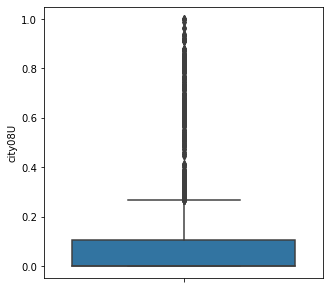

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='city08U', data=datafinal)

<AxesSubplot:ylabel='charge240'>

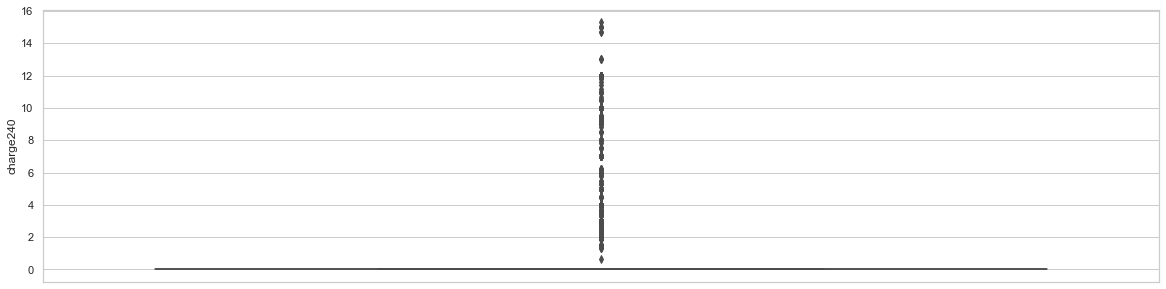

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(y='charge240', data=datafinal)
#no box shows very less values are above 0 as less vehicles are EV

<AxesSubplot:ylabel='co2'>

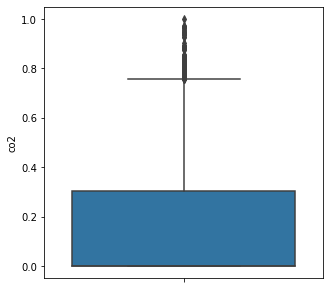

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='co2', data=datafinal)
#presence of outliers but can be milgrade petroleum vehicles

<AxesSubplot:ylabel='co2TailpipeGpm'>

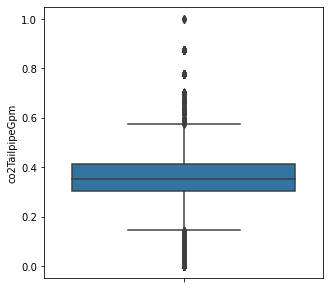

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='co2TailpipeGpm', data=datafinal)
#presence of significant outliers 

<AxesSubplot:ylabel='range'>

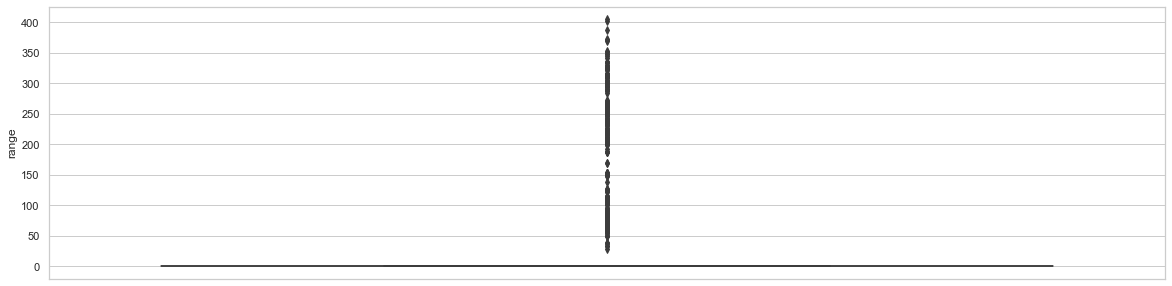

In [134]:
plt.figure(figsize=(20,5))
sns.boxplot(y='range', data=datafinal)

<AxesSubplot:ylabel='youSaveSpend'>

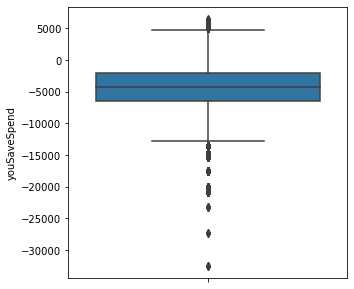

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(y='youSaveSpend', data=data1)

#### Removing unnecessary data with lots of missing values or columns which have high multicollinearity

In [10]:
datafinal=data1.drop(['charge120', 'charge240', 'city08','rangeCity', 'rangeCityA', 'rangeHwy', 'charge240b', 'phevHwy', 'phevComb', 'id',
                          'lv2','lv4', 'pv2', 'pv4', 'hlv', 'hpv', 'highway08U', 'highwayA08', 'highwayA08U', 
                          'highwayCD', 'highwayE','highwayUF', 'fuelCostA08', 'engId','comb08U','combA08', 
                          'combA08U', 'combE','combinedCD','combinedUF', 'mpgData', 'eng_dscr',  'phevBlended',
                          'cityA08', 'cityA08U', 'cityCD', 'cityE', 'createdOn', 'modifiedOn', 'ghgScoreA', 'feScore', 'range'], axis=1)

##### Integerencoding and Onehotencoding of data

In [11]:
#fuelType, fuelType1, 'make', 'VClass'
datafinal1=datafinal.drop(['model'], axis=1)
datafinal1['make']=datafinal1['make'].astype(str)
datafinal1 = pd.get_dummies(datafinal1,prefix=['make'], columns = ['make'])
datafinal1 = pd.get_dummies(datafinal1,prefix=['fuelType'], columns = ['fuelType'])
datafinal1 = pd.get_dummies(datafinal1,prefix=['fuelType1'], columns = ['fuelType1'])
datafinal1 = pd.get_dummies(datafinal1,prefix=['VClass'], columns = ['VClass'])
datafinal1 = pd.get_dummies(datafinal1,prefix=['drive'], columns = ['drive'])
datafinal1 = pd.get_dummies(datafinal1,prefix=['trany'], columns = ['trany'])
#data2 = pd.get_dummies(data1,prefix=['Gender'], columns = ['Gender'])


In [12]:
datafinal1.isnull().sum()

barrels08                                    0
barrelsA08                                   0
city08U                                      0
cityUF                                       0
co2                                          0
co2A                                         0
co2TailpipeAGpm                              0
co2TailpipeGpm                               0
comb08                                       0
cylinders                                    0
displ                                        0
fuelCost08                                   0
ghgScore                                     0
highway08                                    0
rangeHwyA                                    0
UCity                                        0
UCityA                                       0
UHighway                                     0
UHighwayA                                    0
year                                         0
youSaveSpend                                 0
phevCity     

In [13]:
float_col = datafinal1.select_dtypes(include=['float64'])
for col in datafinal1.columns.values:
    datafinal1[col] = datafinal1[col].astype('int64')

In [14]:
datafinal1.columns

Index(['barrels08', 'barrelsA08', 'city08U', 'cityUF', 'co2', 'co2A',
       'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'cylinders',
       ...
       'trany_Automatic 7-spd', 'trany_Automatic 8-spd',
       'trany_Automatic 9-spd', 'trany_Manual 3-spd', 'trany_Manual 4-spd',
       'trany_Manual 4-spd Doubled', 'trany_Manual 5-spd',
       'trany_Manual 6-spd', 'trany_Manual 7-spd', 'trany_Not Available'],
      dtype='object', length=264)

##### Scaling of data

In [15]:
continuous_vars = ['barrels08', 'barrelsA08', 'city08U', 'cityUF', 'co2', 'co2TailpipeGpm', 'co2TailpipeAGpm', 
                  'comb08', 'fuelCost08', 'highway08' , 'rangeHwyA', 'UCityA', 'UHighway','youSaveSpend'
                  ]
minVec = datafinal[continuous_vars].min().copy()
maxVec = datafinal[continuous_vars].max().copy()
datafinal1[continuous_vars] = (datafinal1[continuous_vars]-minVec)/(maxVec-minVec)
datafinal1.head()

,barrels08,barrelsA08,city08U,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,cylinders,displ,fuelCost08,ghgScore,highway08,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,phevCity,make_AM General,make_ASC Incorporated,make_Acura,make_Alfa Romeo,make_American Motors Corporation,make_Aston Martin,make_Audi,make_Aurora Cars Ltd,make_Autokraft Limited,make_Avanti Motor Corporation,make_Azure Dynamics,make_BMW,make_BMW Alpina,make_BYD,make_Bentley,make_Bertone,make_Bill Dovell Motor Car Company,make_Bitter Gmbh and Co. Kg,make_Bugatti,make_Buick,make_CCC Engineering,make_CODA Automotive,make_CX Automotive,make_Cadillac,make_Chevrolet,make_Chrysler,make_Consulier Industries Inc,make_Dabryan Coach Builders Inc,make_Dacia,make_Daewoo,make_Daihatsu,make_Dodge,"make_E. P. Dutton, Inc.",make_Eagle,make_Environmental Rsch and Devp Corp,make_Evans Automobiles,make_Excalibur Autos,make_Federal Coach,make_Ferrari,make_Fiat,make_Fisker,make_Ford,make_GMC,make_General Motors,make_Genesis,make_Geo,make_Goldacre,make_Grumman Allied Industries,make_Grumman Olson,make_Honda,make_Hummer,make_Hyundai,make_Import Foreign Auto Sales Inc,make_Import Trade Services,make_Infiniti,make_Isis Imports Ltd,make_Isuzu,make_J.K. Motors,"make_JBA Motorcars, Inc.",make_Jaguar,make_Jeep,make_Kandi,make_Karma,make_Kenyon Corporation Of America,make_Kia,make_Koenigsegg,make_Laforza Automobile Inc,make_Lambda Control Systems,make_Lamborghini,make_Land Rover,make_Lexus,make_Lincoln,make_London Coach Co Inc,make_London Taxi,make_Lotus,make_MINI,make_Mahindra,make_Maserati,make_Maybach,make_Mazda,make_McLaren Automotive,make_Mcevoy Motors,make_Mercedes-Benz,make_Mercury,make_Merkur,make_Mitsubishi,make_Mobility Ventures LLC,make_Morgan,make_Nissan,make_Oldsmobile,make_PAS Inc - GMC,"make_PAS, Inc",make_Pagani,make_Panos,make_Panoz Auto-Development,make_Panther Car Company Limited,make_Peugeot,make_Pininfarina,make_Plymouth,make_Polestar,make_Pontiac,make_Porsche,make_Quantum Technologies,make_Qvale,make_RUF Automobile,make_Ram,make_Red Shift Ltd.,make_Renault,make_Rolls-Royce,make_Roush Performance,make_Ruf Automobile Gmbh,make_S and S Coach Company E.p. Dutton,make_SRT,make_STI,make_Saab,make_Saleen,make_Saleen Performance,make_Saturn,make_Scion,make_Shelby,make_Spyker,make_Sterling,make_Subaru,make_Superior Coaches Div E.p. Dutton,make_Suzuki,make_TVR Engineering Ltd,"make_Tecstar, LP",make_Tesla,make_Texas Coach Company,make_Toyota,make_VPG,make_Vector,make_Vixen Motor Company,make_Volga Associated Automobile,make_Volkswagen,make_Volvo,make_Wallace Environmental,make_Yugo,make_smart,fuelType_CNG,fuelType_Diesel,fuelType_Electricity,fuelType_Gasoline or E85,fuelType_Gasoline or natural gas,fuelType_Gasoline or propane,fuelType_Midgrade,fuelType_Premium,fuelType_Premium Gas or Electricity,fuelType_Premium and Electricity,fuelType_Premium or E85,fuelType_Regular,fuelType_Regular Gas and Electricity,fuelType_Regular Gas or Electricity,fuelType1_Diesel,fuelType1_Electricity,fuelType1_Midgrade Gasoline,fuelType1_Natural Gas,fuelType1_Premium Gasoline,fuelType1_Regular Gasoline,VClass_Compact Cars,VClass_Large Cars,VClass_Midsize Cars,VClass_Midsize Station Wagons,VClass_Midsize-Large Station Wagons,VClass_Minicompact Cars,VClass_Minivan - 2WD,VClass_Minivan - 4WD,VClass_Small Pickup Trucks,VClass_Small Pickup Trucks 2WD,VClass_Small Pickup Trucks 4WD,VClass_Small Sport Utility Vehicle 2WD,VClass_Small Sport Utility Vehicle 4WD,VClass_Small Station Wagons,VClass_Special Purpose Vehicle,VClass_Special Purpose Vehicle 2WD,VClass_Special Purpose Vehicle 4WD,VClass_Special Purpose Vehicles,VClass_Special Purpose Vehicles/2wd,VClass_Special Purpose Vehicles/4wd,VClass_Sport Utility Vehicle - 2WD,VClass_Sport Utility Vehicle - 4WD,VClass_Standard Pickup Trucks,VClass_Standard Pickup Trucks 2WD,VClass_Standard Pickup Trucks 4WD,VClass_Standard Pickup Trucks/2wd,VClass_Standard Sport Utility Vehicle 2WD,VClass_Standard Sport Utility Vehicle 4WD,VClass_Subcompact 

In [36]:
datafinal1.dtypes

barrels08                                    int64
barrelsA08                                   int64
charge120                                    int64
charge240                                    int64
city08U                                      int64
cityA08                                      int64
cityA08U                                     int64
cityCD                                       int64
cityE                                        int64
cityUF                                       int64
co2                                          int64
co2A                                         int64
co2TailpipeAGpm                              int64
co2TailpipeGpm                               int64
comb08                                       int64
cylinders                                    int64
displ                                        int64
feScore                                      int64
fuelCost08                                   int64
ghgScore                       

##### Creating predictor variables for UCity

In [19]:
x = datafinal1.loc[:, datafinal1.columns != 'UCity']
y = datafinal1.loc[:, datafinal1.columns == 'UCity']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state=0)

In [28]:
x.shape

(43921, 263)

#### Model Building- Neural Network

In [30]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, input_dim=263, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=150, batch_size=10, validation_data=(x_test,y_test))

Epoch 1/150
3514/3514 [==============================] - 14s 4ms/step - loss: 196.4325 - val_loss: 8.2852
Epoch 2/150
3514/3514 [==============================] - 20s 6ms/step - loss: 16.2897 - val_loss: 5.4480
Epoch 3/150
3514/3514 [==============================] - 15s 4ms/step - loss: 10.6213 - val_loss: 5.2902
Epoch 4/150
3514/3514 [==============================] - 17s 5ms/step - loss: 7.1123 - val_loss: 3.9027
Epoch 5/150
3514/3514 [==============================] - 15s 4ms/step - loss: 5.9621 - val_loss: 5.4116
Epoch 6/150
3514/3514 [==============================] - 15s 4ms/step - loss: 6.4311 - val_loss: 5.8600
Epoch 7/150
3514/3514 [==============================] - 15s 4ms/step - loss: 5.8082 - val_loss: 3.2009
Epoch 8/150
3514/3514 [==============================] - 18s 5ms/step - loss: 4.8129 - val_loss: 3.6873
Epoch 9/150
3514/3514 [==============================] - 15s 4ms/step - loss: 6.9697 - val_loss: 2.5075
Epoch 10/150
3514/3514 [==============================] - 15

3514/3514 [==============================] - 16s 4ms/step - loss: 1.3717 - val_loss: 2.1385
Epoch 80/150
3514/3514 [==============================] - 17s 5ms/step - loss: 1.5622 - val_loss: 1.2742
Epoch 81/150
3514/3514 [==============================] - 18s 5ms/step - loss: 1.3935 - val_loss: 1.2158
Epoch 82/150
3514/3514 [==============================] - 14s 4ms/step - loss: 1.3360 - val_loss: 1.5916
Epoch 83/150
3514/3514 [==============================] - 16s 5ms/step - loss: 1.4845 - val_loss: 1.3895
Epoch 84/150
3514/3514 [==============================] - 17s 5ms/step - loss: 1.5454 - val_loss: 1.3585
Epoch 85/150
3514/3514 [==============================] - 15s 4ms/step - loss: 1.6432 - val_loss: 1.0395
Epoch 86/150
3514/3514 [==============================] - 14s 4ms/step - loss: 1.5035 - val_loss: 1.1012
Epoch 87/150
3514/3514 [==============================] - 16s 5ms/step - loss: 1.4105 - val_loss: 1.4610
Epoch 88/150
3514/3514 [==============================] - 17s 5ms/st

##### Model Evaluation

In [50]:
model.evaluate(x_test, y_test)

1098/1098 [==============================] - 3s 2ms/step - loss: 0.8828


0.8828307390213013

In [46]:
y_pred= model.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

1.0051949251806542

#### Model Development-DecisionTree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor 
tree = DecisionTreeRegressor(criterion='mse',  max_depth=10)         
tree.fit(x_train, y_train)
tree.score(x_train, y_train)

0.9977995877946142

In [43]:
y_pred=tree.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1.002594097918322

In [118]:
x.describe()
datafinal1=datafinal1.drop["cityUF", "highwayUF"]

,barrels08,barrelsA08,charge120,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,phevBlended,pv2,pv4,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UHighway,UHighwayA,year,youSaveSpend,phevCity,phevHwy,phevComb,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electricity,fuel_type_Gasoline or E85,fuel_type_Gasoline or natural gas,fuel_type_Gasoline or propane,fuel_type_Midgrade,fuel_type_Premium,fuel_type_Premium Gas or Electricity,fuel_type_Premium and Electricity,fuel_type_Premium or E85,fuel_type_Regular,fuel_type_Regular Gas and Electricity,fuel_type_Regular Gas or Electricity,fuelType1_Diesel,fuelType1_Electricity,fuelType1_Midgrade Gasoline,fuelType1_Natural Gas,fuelType1_Premium Gasoline,fuelType1_Regular Gasoline,fuelType2_0,fuelType2_E85,fuelType2_Electricity,fuelType2_Natural Gas,fuelType2_Propane
count,43921.000000,43921.000000,43921.0,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.0,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.0,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.0,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000
mean,16.562146,0.199699,0.0,6.953234,0.803420,0.654607,0.000250,0.500125,0.0,107.017987,5.846952,17.024658,460.909793,20.950297,7.738895,0.858769,0.687985,0.507570,0.000182,0.0,5.670955,2.894743,7666.484074,2624.832085,84.580269,0.642563,-0.921974,24.823296,9.099246,0.957355,0.755652,0.000182,0.517543,0.0,1.977687,10.067986,22101.964687,1.772979,6.041620,0.004189,13.328704,33.580633,1.215455,0.149655,1.143121,0.139318,34.510781,1.278432,2002.756927,-4360.527993,0.245236,0.247535,0.245167,0.001366,0.027390,0.006534,0.030828,0.000455,0.000182,0.002937,0.293800,0.001298,0.002664,0.002892,0.628037,0.001525,0.000091,0.027390,0.006534,0.002937,0.001366,0.300653,0.661119,0.960065,0.033720,0.005578,0.000455,0.000182
std,4.673314,1.036640,0.0,12.645822,6.196962,6.048420,0.034075,4.847742,0.0,187.162456,57.051850,92.017591,125.358826,8.506240,13.228755,6.175442,5.974681,4.866809,0.026992,0.0,1.820663,1.387004,16816.265561,737.596732,451.324692,2.876897,0.652262,8.363189,14.636387,6.316232,6.052054,0.026992,4.914637,0.0,5.915676,27.829755,12824.229781,4.320524,9.560227,0.064590,30.882805,46.030358,17.343308,2.632350,16.538351,2.357547,12.088991,8.793124,11.764501,3702.185122,3.618523,3.500939,3.542482,0.036936,0.163219,0.080572,0.172854,0.021335,0.013495,0.054116,0.455507,0.036002,0.051545,0.053696,0.483334,0.039028,0.009543,0.163219,0.080572,0.054116,0.036936,0.458547,0.473335,0.195810,0.180509,0.074480,0.021335,0.013495
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,450.000000,0.000000,-1.000000,-1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1984.000000,-32500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

##### K-Fold Cross Validation

[0.99656537 0.9968108  0.99780507 0.99743138 0.99725435 0.99658264
 0.99479911 0.99695891 0.99722161 0.99616026]


<AxesSubplot:>

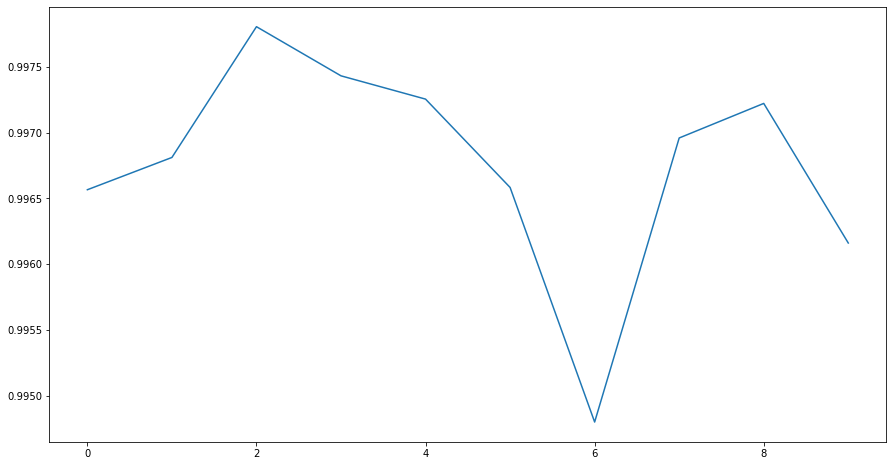

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(
    estimator=tree,
    X = x_train,
    y = y_train,
    cv=10
    )
print(accuracies)
plt.figure(figsize=(15,8))
sns.lineplot(y=accuracies,x= np.arange(0,10,1))

##### Conclusion
Any of the above model is suitable for this kind of problem